# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import for readability of data coming back from the API retrieval
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (.csv)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
 
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up the static url information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

temperature_unit = "Imperial"

# Initialize the lists for use in holding associated data.
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Initialize an integer to count the records
record_counter = 1

print(f"Beginning Data Retrieval")

# Loop through the cities and pull the requested  weather information from the openweathermap

for city in cities:
   
    query_url = base_url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + temperature_unit
    response = requests.get(query_url).json()

    try:
      
      # Print out the city being worked with 
      print(f"Processing Record {record_counter} of Set 1 | {city}")  
            
      cloudiness.append(response["clouds"]["all"])
      country.append(response["sys"]["country"])
      date.append(response["dt"])
      max_temp.append(response["main"]["temp_max"])
      humidity.append(response["main"]["humidity"])
      lat.append(response["coord"]["lat"])
      lng.append(response["coord"]["lon"])
      wind_speed.append(response["wind"]["speed"])
      city_name.append(response["name"])
        
      # Increment the record counter     
      record_counter += 1
            
    except:    
      print(f"   Unable to locate City:  {city}")
      record_counter += 1
            
print(f"-----------------------------")
print(f" Data Retrieval Complete")  
print(f"-----------------------------")            

Beginning Data Retrieval
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | sur
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | copiapo
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | margate
Processing Record 9 of Set 1 | warmbad
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | seymchan
Processing Record 13 of Set 1 | mount gambier
Processing Record 14 of Set 1 | necochea
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | aksay
Processing Record 17 of Set 1 | chor
Processing Record 18 of Set 1 | huarmey
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | chegdomyn
Processing Record 21 of Set 1 | aklavik
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of Set 1 | grand forks
Processing Record 24 of Set 1 | luderitz
Processing Re

Processing Record 185 of Set 1 | jizan
Processing Record 186 of Set 1 | alyangula
Processing Record 187 of Set 1 | quatre cocos
Processing Record 188 of Set 1 | san cristobal
Processing Record 189 of Set 1 | bengkulu
Processing Record 190 of Set 1 | gurlan
Processing Record 191 of Set 1 | nyurba
Processing Record 192 of Set 1 | illoqqortoormiut
   Unable to locate City:  illoqqortoormiut
Processing Record 193 of Set 1 | umm lajj
Processing Record 194 of Set 1 | port-cartier
Processing Record 195 of Set 1 | balykshi
Processing Record 196 of Set 1 | sorong
Processing Record 197 of Set 1 | tasiilaq
Processing Record 198 of Set 1 | labranzagrande
Processing Record 199 of Set 1 | thurles
Processing Record 200 of Set 1 | pontianak
Processing Record 201 of Set 1 | dunedin
Processing Record 202 of Set 1 | plettenberg bay
Processing Record 203 of Set 1 | hasaki
Processing Record 204 of Set 1 | livingston
Processing Record 205 of Set 1 | talas
Processing Record 206 of Set 1 | puksoozero
Processi

Processing Record 366 of Set 1 | arbazh
Processing Record 367 of Set 1 | coihaique
Processing Record 368 of Set 1 | payakumbuh
Processing Record 369 of Set 1 | pilar
Processing Record 370 of Set 1 | cabra
Processing Record 371 of Set 1 | christchurch
Processing Record 372 of Set 1 | mount isa
Processing Record 373 of Set 1 | attawapiskat
   Unable to locate City:  attawapiskat
Processing Record 374 of Set 1 | borazjan
Processing Record 375 of Set 1 | pimenta bueno
Processing Record 376 of Set 1 | paamiut
Processing Record 377 of Set 1 | vanimo
Processing Record 378 of Set 1 | waingapu
Processing Record 379 of Set 1 | bolonchen
   Unable to locate City:  bolonchen
Processing Record 380 of Set 1 | san quintin
Processing Record 381 of Set 1 | kroya
Processing Record 382 of Set 1 | taksimo
Processing Record 383 of Set 1 | san patricio
Processing Record 384 of Set 1 | faya
Processing Record 385 of Set 1 | pandharpur
Processing Record 386 of Set 1 | starkville
Processing Record 387 of Set 1 

Processing Record 549 of Set 1 | kahului
Processing Record 550 of Set 1 | rocha
Processing Record 551 of Set 1 | warqla
   Unable to locate City:  warqla
Processing Record 552 of Set 1 | palmerston
Processing Record 553 of Set 1 | kisangani
Processing Record 554 of Set 1 | leshukonskoye
Processing Record 555 of Set 1 | roebourne
Processing Record 556 of Set 1 | santa rosa
Processing Record 557 of Set 1 | presidente epitacio
Processing Record 558 of Set 1 | zyryanovsk
Processing Record 559 of Set 1 | sabinas
Processing Record 560 of Set 1 | kemijarvi
Processing Record 561 of Set 1 | morogoro
Processing Record 562 of Set 1 | grand-santi
Processing Record 563 of Set 1 | nicoya
Processing Record 564 of Set 1 | riyadh
Processing Record 565 of Set 1 | nabire
Processing Record 566 of Set 1 | yilan
Processing Record 567 of Set 1 | boffa
Processing Record 568 of Set 1 | jatai
Processing Record 569 of Set 1 | khoy
Processing Record 570 of Set 1 | brigantine
Processing Record 571 of Set 1 | tompa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe to prepare the order the data will be written to the output file cities.csv
api_city_weather_df = pd.DataFrame({"City": city_name,
                                    "Lat": lat,
                                    "Lng": lng,
                                    "Max Temp": max_temp,
                                    "Humidity": humidity,
                                    "Cloudiness": cloudiness,
                                    "Wind Speed": wind_speed,
                                    "Country": country,
                                    "Date": date
             })  


In [5]:
# Export the City weather data into a .csv file

api_city_weather_df.to_csv("Resources/cities.csv",
                  encoding="utf-8", index=False, header=True)

In [6]:
# Print the dataframe which represents the data written to the cities.csv file
api_city_weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,71.01,60,41,5.99,AU,1615525401
1,Sur,22.5667,59.5289,85.30,35,0,2.77,OM,1615525364
2,Saskylakh,71.9167,114.0833,-7.92,88,100,16.84,RU,1615525552
3,Mataura,-46.1927,168.8643,64.00,67,1,7.00,NZ,1615525552
4,Albany,42.6001,-73.9662,60.80,55,75,13.80,US,1615525553


In [7]:
api_city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,18.653621,18.123717,54.908071,72.700375,51.535581,8.135618,1.615526e+09
std,33.594004,90.067951,28.294671,19.626152,39.120462,5.942376,3.280011e+02
min,-54.800000,-175.200000,-23.820000,11.000000,0.000000,0.180000,1.615525e+09
25%,-9.531225,-63.434500,39.000000,63.000000,5.000000,3.760000,1.615526e+09
50%,22.452550,18.183700,63.420000,76.000000,52.000000,6.910000,1.615526e+09
75%,46.570775,101.670850,77.305000,87.000000,90.000000,11.500000,1.615526e+09
max,78.218600,175.515300,98.600000,100.000000,100.000000,38.740000,1.615527e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.

#      At this time, there does not appear to be any cities having humidity > 100%
#      As per the instructions, skipping this step

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#     At this time, there does not appear to be any cities having humidity > 100%
#     As per the instructions, skipping this step


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

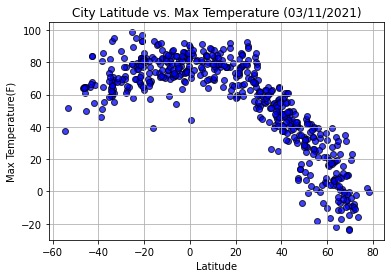

In [10]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Max Temp"], 
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.grid()
plt.title("City Latitude vs. Max Temperature (03/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.savefig("Images/LatitudeVSTemperature.png")
plt.show()

## Latitude vs. Humidity Plot

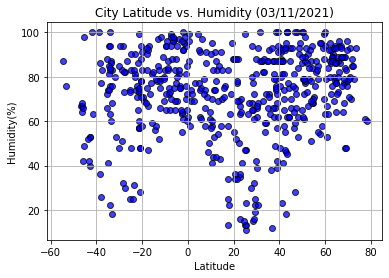

In [11]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Humidity"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Humidity (03/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.savefig("Images/LatitudeVSHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

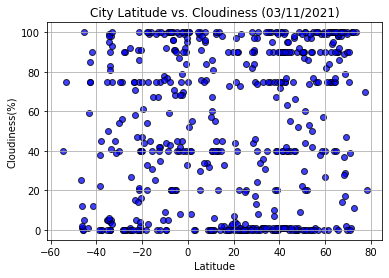

In [12]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Cloudiness"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Cloudiness (03/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

plt.savefig("Images/LatitudeVSCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

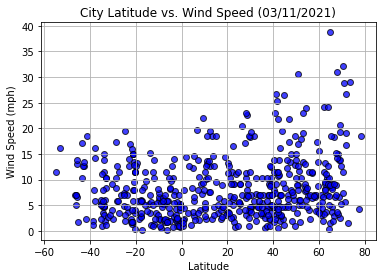

In [13]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Wind Speed"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Wind Speed (03/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("Images/LatitudeVSWindSpeed.png")
plt.show()

## Linear Regression

In [14]:
# Northern Hemisphere is where Latitude ranges from 0 through +90  
northernhemisphere = api_city_weather_df.loc[(api_city_weather_df["Lat"] >= 0) & (api_city_weather_df["Lat"] <= 90), :]

# Southern Hemisphere is where Latitude ranges from 0 through -90 
southernhemisphere = api_city_weather_df.loc[(api_city_weather_df["Lat"] >= -90) & (api_city_weather_df["Lat"] <= 0), :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.9008036219267126


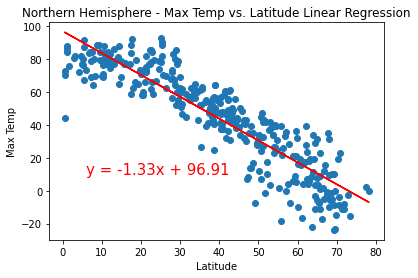

In [15]:
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.4577032631626524


Text(0, 0.5, 'Max Temp')

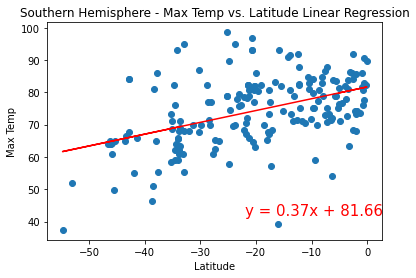

In [16]:
x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-22,42), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.27399772193454064


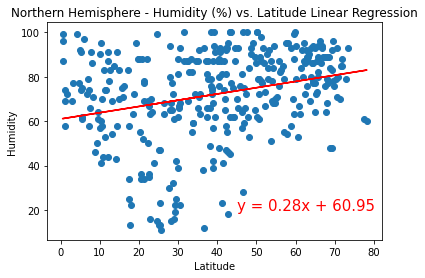

In [17]:
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(45,20), fontsize=15, color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.2685939505826428


Text(0, 0.5, 'Humidity')

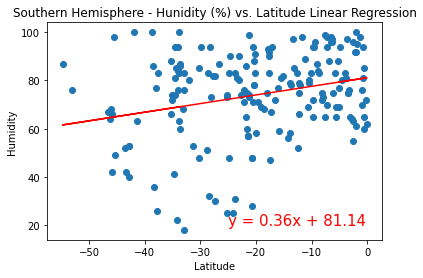

In [18]:
x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,20), fontsize=15, color="red")
plt.title("Southern Hemisphere - Hunidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.23414782570242154


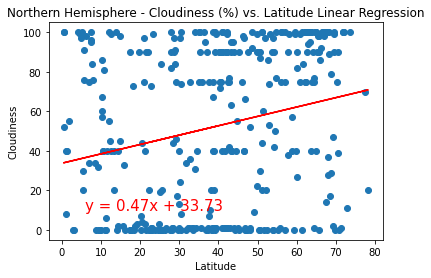

In [19]:
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.3064529822179962
y = 0.84x + 66.76


Text(0, 0.5, 'Cloudiness')

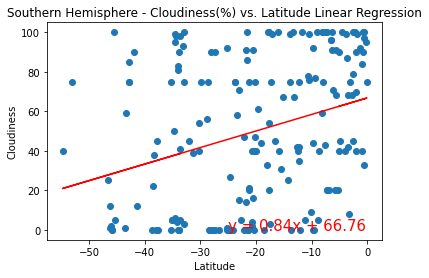

In [20]:
x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,0), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.18527605047893583


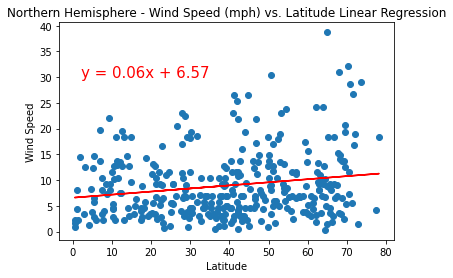

In [21]:
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(2,30), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.3190535280548206


Text(0, 0.5, 'Wind Speed')

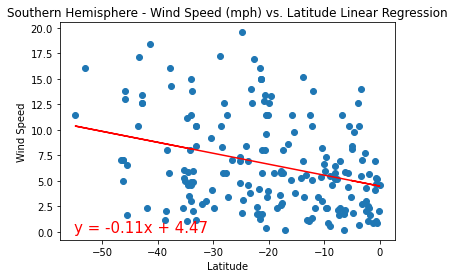

In [22]:
x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,0), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')